# **Homework 2 - Missense Mutations**

The purpose of this homework is to get you familiar with identification and interpretation of missense mutations in cancer datasets.

License: This document is open source under [CC BY-ND 4.0](https://en.wikipedia.org/wiki/Creative_Commons_license).

# **Completing the Assignment**

This notebook is your homework #2. To complete the homework and receive credit, you need to work through all 4 sections. Within each thematic section is a mix of explanatory text cells and code cells. Some code cells have code written for you; some ask you to write code. At the end of each section are 'Practice Problems'. You should write code to answer the questions - following the directions given. Once you are ready to submit your answer, run the submission code block below every question block. If you get a question wrong, fix your code and try again. If you get stumped, ask for a hint using the hint code block below each submission code block.

You should derive all answers with software code. You should not take any shortcuts, like printing out a table, manually looking up an answer, and explicitly declaring the variable - answer_1 = "KRAS". These type of shortcuts prevent your learning to code, and will not be feasible on later homeworks where datasets are larger and homeworks are harder. Please take the time now to learn.

Your first step will be to save this notebook as a copy so that you can edit it. (File->Save a copy in Drive).

Have fun.

# **Learning Outcomes**
#### Biological

*   Identify frequent mutations in cancer cohorts.
*   Compare and contrast different cancer types.
*   Assess functional impact of DNA mutation.

#### Computational

*   Access UniProt knowledgebase using API.
*   Parse JSON and integrate cancer data with UniProt.

# **Topics and Background Reading**
In homework 2, we are working on understanding missense mutations and how those mutations will appear in a dataset. [Missense mutations](https://en.wikipedia.org/wiki/Missense_mutation) are a common genetic mutation where the change of one nucleotide causes the protein translation to encode a different amino acid. These mutations can affect protein function through changes to folding, binding affinity, or biochemical activity.

This homework will be starting from processed DNA sequencing reads, typically found in a [MAF](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/) file. The dataset that we will be examining is from the [CPTAC](https://proteomics.cancer.gov/programs/cptac) cohorts for ovarian and other cancers. All data presented here represent [somatic mutations](https://en.wikipedia.org/wiki/Somatic_mutation), and therefore are not considered personally identifiable. \



As discussed in class, here are the papers that were assigned.

**DNA Mutations**
- [Wood 2007](https://pubmed.ncbi.nlm.nih.gov/17932254/)
- [Lawrence 2013](https://pubmed.ncbi.nlm.nih.gov/23770567/)

**Uniprot**
- [Uniprot Consortium 2019](https://pubmed.ncbi.nlm.nih.gov/30395287/)

# Part 1. Setup

Google Colabs is a web service that allows you to write interactive Python (iPython) in notebooks. This web service runs on a virtual computer (virtual machine or VM) that is set up just for you. Initially, that VM only includes the most common Python libraries. So we first need to install our cptac package on the VM. This is done with a server directive, which is recognized because it starts with '!'.

In [ ]:
!pip install cptac==1.1.0
!pip install biograder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
  Attempting uninstall: polars
    Found existing installation: polars 0.17.3
    Uninstalling polars-0.17.3:
      Successfully uninstalled polars-0.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 6.2.0 requires pyarrow<13,>=2, but you have pyarrow 14.0.2 which is incompatible.


Next step in the setup will be familiar as we import packages. We also need to download (onto the VM) the cptac datasets. We will be looking at the LUAD cohort, which holds sample information of lung adenocarcinoma.

In [ ]:
import cptac
#This may take some time. Be patient, it might be a few minutes for spotty connections.
cptac.download('luad')
#Instantiate a data object, the LUAD cancer dataset.
luad = cptac.Luad()

cptac warning: Your version of cptac (1.1.0) is out-of-date. Latest is 1.5.10. Please run 'pip install --upgrade cptac' to update it. (/usr/lib/python3.10/threading.py, line 953)


We also need to get the homework autograder. This will have the same steps of server install, importing, and object creation.



In [ ]:
import biograder
#The missense mutations homework is #2
biograder.download("bio462_hw2")
myID = "s15211" #Your student id, or 'temp'
hw = biograder.bio462_hw2(student_id = myID) #Instantiate the homework grader object.
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


# Part 2. Frequency of Mutations

Each cancer type contains [somatic mutation](https://en.wikipedia.org/wiki/Somatic_mutation) data for patients in the cohort. This is accessed from the cptac package with a call to 'get_somatic_mutation' which returns a dataframe. Each row in the dataframe lists a specific gene that was mutated, the type of mutation, and the location of the mutation. This data is a direct import of a [MAF](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/) file.



In [ ]:
#Use the function .get_somatic_mutation()
luad_mutations = luad.get_somatic_mutation()
luad_mutations.head(20) #Look at the first 20 rows to see what information is contained in the dataframe.

Name,Gene,Mutation,Location
Patient_ID,,,
C3L-00001,ABCB1,Missense_Mutation,p.F16C
C3L-00001,ABCG1,Missense_Mutation,p.V148M
C3L-00001,ADCY2,Missense_Mutation,p.R480H
C3L-00001,AKAP4,Missense_Mutation,p.E473K
C3L-00001,ASTN1,Missense_Mutation,p.S841Y
C3L-00001,AVL9,Missense_Mutation,p.G568S
C3L-00001,CACNB1,Nonsense_Mutation,p.Q317*
C3L-00001,CCDC106,Missense_Mutation,p.A226G
C3L-00001,CD248,Missense_Mutation,p.L657V


There are a few things to notice in this dataframe. First, you can see that there are many mutations for a single sample. Cancer is caused by DNA mutations, and typically many mutations are in different genes and different locations. Second, there are also different kinds of point mutations documented. \

For this homework, we are only interested in the missense mutations, so we will need to filter the dataframe.

The nomenclature used here for missense mutations is as follows:
* 'p.' standing for 'protein'
* A letter signifying the amino acid in the reference sequence.
* The residue amino acid position along the amino acid chain.
* The amino acid that is now coded for in that gene.



In [ ]:
luad_missense = luad_mutations.loc[(luad_mutations['Mutation'] == 'Missense_Mutation')]
luad_missense.head(20)

Name,Gene,Mutation,Location
Patient_ID,,,
C3L-00001,ABCB1,Missense_Mutation,p.F16C
C3L-00001,ABCG1,Missense_Mutation,p.V148M
C3L-00001,ADCY2,Missense_Mutation,p.R480H
C3L-00001,AKAP4,Missense_Mutation,p.E473K
C3L-00001,ASTN1,Missense_Mutation,p.S841Y
C3L-00001,AVL9,Missense_Mutation,p.G568S
C3L-00001,CCDC106,Missense_Mutation,p.A226G
C3L-00001,CD248,Missense_Mutation,p.L657V
C3L-00001,CSMD1,Missense_Mutation,p.G2162V


To understand the dataset, let's narrow down to a single gene, [KRAS](https://en.wikipedia.org/wiki/KRAS).

In [ ]:
#Use luad_missense and write a complex selection to get the KRAS gene.
#Your code should end in the creation of a variable called 'luad_kras'
###      Your code here      ###
luad_kras = luad_missense.loc[(luad_missense['Gene'] == 'KRAS')]
luad_kras

Name,Gene,Mutation,Location
Patient_ID,,,
C3L-00094,KRAS,Missense_Mutation,p.G12D
C3L-00263,KRAS,Missense_Mutation,p.G12C
C3L-00279,KRAS,Missense_Mutation,p.G12D
C3L-00412,KRAS,Missense_Mutation,p.G12C
C3L-00913,KRAS,Missense_Mutation,p.G13C
C3L-00973,KRAS,Missense_Mutation,p.G12D
C3L-01632,KRAS,Missense_Mutation,p.G12C
C3L-01862,KRAS,Missense_Mutation,p.Q61H
C3L-01924,KRAS,Missense_Mutation,p.G12C


Using the nomenclature we just learned you can decode "p.G12D" as a mutation from glycine to aspartate at amino acid 12.

## PRACTICE PROBLEMS

1. Which amino acid is the residue mutation in KRAS p.Q61H?

In [ ]:
###       Question 1         ###
#  Which amino acid is the residue mutation in KRAS p.Q61H?
#  Your answer should be the one letter amino acid code.
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###
import re
pattern = re.compile(r"p.([RNDBCEQZGHILKMFPSTWYV]{1})(\d{1,2})([RNDBCEQZGHILKMFPSTWYV]{1})")

amino_acids = {'alanine':'A','arginine':'R','asparagine':'N','aspartic acid':'D','asparagine':'B','cysteine':'C','glutamic acid':'E',
               'glutamine':'Q','glycine':'G','histidine':'H','isoleucine':'I','leucine':'L','lysine':'K','methionine':'M','phenylalanine':'F',
               'proline':'P','serine':'S','threonine':'T','tryptophan':'W','tyrosine':'Y','valine':'V'}

location = "p.Q61H"
mo = re.search(pattern, location)

residue = mo.group(1)
amino_acid_loc = mo.group(2)


if residue in [value for value in amino_acids.values()]:
  aa = [key for key in amino_acids.keys() if 'Q' in amino_acids[key]]

answer_1 = str(residue) #aa[0].upper()
print(answer_1)

Q


In [ ]:
###  Question 1: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_1'.
result = hw.submit(question = 1, answer = answer_1)
print(result)

False


In [ ]:
### Question 1: Getting help ###
hints = hw.getHint(question=1)
print(hints)

Question 1 hints:
*Make sure the answer is uppercase.
*Use the properties of a string to get the correct character.


2. Which location is the most common for the KRAS gene in the LUAD cohort?

In [ ]:
###       Question 2         ###
#  Which location is the most common for the KRAS gene in the LUAD cohort?
#  Your answer should be the fully encoded mutation, e.g. p.Q61H
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###
df_kras = luad_kras['Location'].value_counts()

answer_2 = ""
i = 0

for loc, count in df_kras.items():
  if count > i:
    i = count
    answer_2 = loc

print(answer_2)


p.G12C


In [ ]:
###  Question 2: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_2'.
result = hw.submit(question = 2, answer = answer_2)
print(result)

True


In [ ]:
### Question 2: Getting help ###
hints = hw.getHint(question=2)
print(hints)

Question 2 hints:
*Use a function that counts the locations then orders them from most to least.
*Find a way to pull out the top location.


3. How many people have the most common KRAS mutation?

In [ ]:
###       Question 3         ###
#  How many people have the most common KRAS mutation?
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###
answer_3 = df_kras[answer_2]
print(answer_3)


16


In [ ]:
###  Question 3: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_3'.
result = hw.submit(question = 3, answer = answer_3)
print(result)

True


In [ ]:
### Question 3: Getting help ###
hints = hw.getHint(question=3)
print(hints)

Question 3 hints:
*Use a function that counts the locations then orders them from most to least.
*Find a way to pull out the value of the top count.


4. Which gene has the most missense mutations in the LUAD cohort?

In [ ]:
###       Question 4         ###
#  Which gene has the most missense mutations in the LUAD cohort?
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###
gene_count = luad_missense['Gene'].value_counts()
print(gene_count)

answer_4 = ""
i = 0
for gene,count in gene_count.items():
  if count > i:
    i = count
    answer_4 = gene

print(answer_4)

TTN         59
RYR2        50
TP53        44
CSMD3       44
MUC16       44
            ..
PRKAR2B      1
PPP3CC       1
PPP1R13B     1
CEP164       1
ZNF721       1
Name: Gene, Length: 9711, dtype: int64
TTN


In [ ]:
###  Question 4: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_4'.
result = hw.submit(question = 4, answer = answer_4)
print(result)

True


In [ ]:
### Question 4: Getting help ###
hints = hw.getHint(question=4)
print(hints)

Question 4 hints:
*Use the dataframe with all of the missense mutations in the luad cohort.
*Use a function that counts all the missense mutations of each gene.
*Very similar to problems 2 and 3.


# Part 3. Comparing Different Cancers

It is important to recognize that not all cancers are the same. Ovarian cancer is not the same as lung cancer. Certain cancers have commonly mutated genes and it is important to notice those trends/patterns. Identifying similarities and differences give us a deeper understanding of cancer. We will be comparing missense mutations in the LUAD and ovarian cohort to get a better understanding of the differences.

In [ ]:
#Download the ovarian cptac cohort.
#This may take some time. Be patient, it might be a few minutes for spotty connections.
cptac.download('ovarian')
#Instantiate a data object, the ovarian cancer dataset.
ov = cptac.Ovarian()

First, get the somatic mutations for ovarian cancer and select out just the missense mutations

In [ ]:
#Get the missense mutations for the ovarian cohort.
#Your code should end in the creation of a variable called 'ov_missense'
##  Your code here  ##

ov_mutations = ov.get_somatic_mutation()
ov_mutations

ov_missense  = ov_mutations.loc[(ov_mutations['Mutation'] == 'Missense_Mutation')]
ov_missense



Name,Gene,Mutation,Location
Patient_ID,,,
01OV007,ALPK1,Missense_Mutation,p.C39F
01OV007,AP4B1,Missense_Mutation,p.C420Y
01OV007,ARHGAP6,Missense_Mutation,p.E274V
01OV007,ARMC6,Missense_Mutation,p.L319V
01OV007,BAI2,Missense_Mutation,p.A229P
...,...,...,...
26OV013,TRPM8,Missense_Mutation,p.G887R
26OV013,TXNRD3NB,Missense_Mutation,p.E6K
26OV013,VNN2,Missense_Mutation,p.A281S


Now we want to look at the frequency of mutated genes for both the ovarian and LUAD cohorts. These practice problems will help you to find the differences and similarities among the data.

## PRACTICE PROBLEMS

5. How many genes are mutated at more than 10% frequency in the ovarian cohort?

In [ ]:
###       Question 5         ###
#  How many genes are mutated at more than 10% frequency in the ovarian cohort?
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###

# Obtaining the number of samples
sample_ID = {}
gene_mutations = ov_mutations['Gene']

for patient,gene in gene_mutations.items():
  if patient in sample_ID.keys():
    if gene in sample_ID.values():
      continue
    else:
      sample_ID[patient].add(gene)
  else:
    sample_ID[patient] = {gene}

for patient,genes in sample_ID.items():
  print(f"{patient}:\n {genes}\n")

patient_tot = len(sample_ID.keys())

# Obtaining the frequency of each gene mutation
mutation_counts = ov_missense['Gene'].value_counts()
print(mutation_counts)

num_of_genes = 0

for gene,count in mutation_counts.items():

  freq = (count/patient_tot)*100
  if freq > 10:
    num_of_genes += 1
    print(f"{gene}: {freq}")

answer_5 = num_of_genes
print(num_of_genes)



01OV007:
 {'STAC3', 'DHX9', 'GALNT1', 'NBEAL1', 'ARMC6', 'CD84', 'PCLO', 'XXYLT1', 'USP17L2', 'C10orf126', 'UVSSA', 'CDKN2AIP', 'STARD13', 'GUCY2F', 'WDFY3', 'ALPK1', 'CREB5', 'TMPRSS9', 'MAST3', 'GABRR1', 'KIAA1875', 'OR6B3', 'RBL1', 'LRIT1', 'PLXNB2', 'CCDC129', 'XIRP2', 'AP4B1', 'TYRO3', 'PRICKLE1', 'EXOC5', 'C2CD4A', 'ZCCHC17', 'TAS2R46', 'OPLAH', 'HSDL2', 'GDPD3', 'IFI44L', 'ARHGAP6', 'CLEC14A', 'SLC38A6', 'MYL9', 'TRAJ46', 'TP53', 'NELL2', 'RPAP1', 'NANOS3', 'RBM10', 'SI', 'FMO1', 'OR4C15', 'IL13RA2', 'PCCA', 'TUBB4A', 'RPS6KA3', 'MAMDC2', 'EPAS1', 'BMS1', 'DNHD1', 'COL21A1', 'KIAA1210', 'MIOS', 'RASAL1', 'MYO9B', 'HSPA12A', 'ZNF681', 'MAGEB10', 'RIT2', 'STK35', 'MYO16', 'SATB1', 'CSTF2T', 'GRIP1', 'ENG', 'NID1', 'CEP250', 'ZNF107', 'CENPM', 'PEAR1', 'DFNA5', 'ZBED4', 'PLCH1', 'HIST1H3D', 'FAM57B', 'SLC24A1', 'RPL30', 'PRAMEF17', 'SYNE1', 'POGZ', 'OR2B6', 'MIB1', 'TSPAN16', 'SCN2A', 'HDAC2', 'MMGT1', 'GALNTL5', 'ZC3H12B', 'ZFPL1', 'ECT2', 'FGF18', 'SLC22A23', 'MECOM', 'TACC2', 'C

In [ ]:
###  Question 5: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_5'.
result = hw.submit(question = 5, answer = answer_5)
print(result)

True


In [ ]:
### Question 5: Getting help ###
hints = hw.getHint(question=5)
print(hints)

Question 5 hints:
*Use a function to get the amount of different samples in the cohort.
*Use a function that counts all the missense mutations of each gene.
*Iterate through each gene and calculate its frequency in the population.
*Count how many genes have a frequency greater than 10%.


6. Which missense mutations are shared between LUAD and ovarian cancer?

In [ ]:
###       Question 6         ###
#  Which missense mutations are shared between LUAD and ovarian cancer?
#  Your answer should be an alphanumerically sorted string of unique mutations separated by a comma and a space.
#  Each mutation should be encoded as 'gene_mutation'.
#  e.g. "KRAS_p.G523A,KRAS_p.G523C,KRAS_p.G635B,KRAS_p.M46E,PIK3CA_p.A2R"
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###

def gene_location(gene_name_missense):
  gene = gene_name_missense['Gene']
  Location = gene_name_missense['Location']

  genes = []
  Locations = []
  for patient,gene in gene.items():
    genes.append(gene)

  for patient,Location in Location.items():
    Locations.append(location)

  gene_loc = set()
  i = 0
  while i < len(genes):
    gene_loc.add(f"{genes[i]}_{Locations[i]}")
    i += 1

  return gene_loc

ov_genes = gene_location(ov_missense)
luad_genes = gene_location(luad_missense)

comm_mutations = sorted(ov_genes.intersection(luad_genes))
print(comm_mutations)

answer_6 = ""
for gene in comm_mutations:
  answer_6 += f"{gene}, "

answer_6 = answer_6.strip(", ")
print(answer_6)


# for name, gene, mutation in ov_missense[['Gene','Mutation']].items():
#   ov_genes.add(f"{gene}_{mutation}")

# for name, gene,mutation in luad_missense['Gene'].items():
#   luad_genes.add(f"{gene}_{mutation}")

#print(ov_genes)






['A1CF_p.Q61H', 'A2ML1_p.Q61H', 'A2M_p.Q61H', 'A4GNT_p.Q61H', 'AACS_p.Q61H', 'AARS2_p.Q61H', 'AATK_p.Q61H', 'ABCA10_p.Q61H', 'ABCA12_p.Q61H', 'ABCA13_p.Q61H', 'ABCA1_p.Q61H', 'ABCA2_p.Q61H', 'ABCA3_p.Q61H', 'ABCA4_p.Q61H', 'ABCA5_p.Q61H', 'ABCA8_p.Q61H', 'ABCB10_p.Q61H', 'ABCB11_p.Q61H', 'ABCB1_p.Q61H', 'ABCB4_p.Q61H', 'ABCB5_p.Q61H', 'ABCB6_p.Q61H', 'ABCC10_p.Q61H', 'ABCC11_p.Q61H', 'ABCC2_p.Q61H', 'ABCC3_p.Q61H', 'ABCC5_p.Q61H', 'ABCC6_p.Q61H', 'ABCC8_p.Q61H', 'ABCC9_p.Q61H', 'ABCD1_p.Q61H', 'ABCG5_p.Q61H', 'ABCG8_p.Q61H', 'ABHD16B_p.Q61H', 'ABTB2_p.Q61H', 'AC114783.1_p.Q61H', 'ACAA2_p.Q61H', 'ACACA_p.Q61H', 'ACACB_p.Q61H', 'ACAD10_p.Q61H', 'ACAD9_p.Q61H', 'ACAN_p.Q61H', 'ACAP1_p.Q61H', 'ACAP2_p.Q61H', 'ACCS_p.Q61H', 'ACE_p.Q61H', 'ACLY_p.Q61H', 'ACO2_p.Q61H', 'ACOT11_p.Q61H', 'ACOT12_p.Q61H', 'ACOT13_p.Q61H', 'ACP6_p.Q61H', 'ACPT_p.Q61H', 'ACRC_p.Q61H', 'ACSBG1_p.Q61H', 'ACSBG2_p.Q61H', 'ACSF2_p.Q61H', 'ACSL4_p.Q61H', 'ACSL6_p.Q61H', 'ACSM2A_p.Q61H', 'ACSM2B_p.Q61H', 'ACSM4_p.Q61H',

In [ ]:
###  Question 6: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_6'.
result = hw.submit(question = 6, answer = answer_6)
print(result)

False


In [ ]:
### Question 6: Getting help ###
hints = hw.getHint(question=6)
print(hints)

Question 6 hints:
*Use a function that will find the intersection of genes and locations between two datasets.
*Make sure your list is in alpha-numeric order.
*Make sure you converted the list to a string with each mutation separated by a comma and a space.
*Try using the sorted() function to sort the list.


# Part 4. Functional Regions and Variants

We now know how to find a missense mutation in genes. What do we do with that information? How do we know if it is an important mutation? Let's look at [UniProt](https://www.uniprot.org/), a database that annotates proteins. There is a UniProt Web API where we can retrieve the information for a specific protein. The main API is accessed via a protein accession. However, our CPTAC data only contains the protein's name. Luckily the API also has a service to look up this information. We created the query below for the KRAS protein in humans. The query returns the accession number to access the information of KRAS.

In [ ]:
#Get the accession number from UniProt to search protein domains.
import requests

url = 'https://rest.uniprot.org/uniprotkb/search'

params = {
    'format': 'list',
    'query': 'gene_exact:kras AND organism_id:9606 AND reviewed:true'
}

response = requests.get(url, params=params)
kras_accession = response.text.rstrip()
print(kras_accession)

P01116


With the accession, we access the main API and ask UniProt to give us information about the natural variants in KRAS. Natural variants are defined as polymorphisms and variations between individuals. When we access the natural variant of KRAS from UniProt, it will give us back something that we'll need to take a careful look at.

In [ ]:
#Get data from UniProt about KRAS regions.
import requests
variant_response = requests.get('https://www.ebi.ac.uk/proteins/api/features/' + kras_accession + '?types=VARIANT')
print(type(variant_response))
print(variant_response.text)

<class 'requests.models.Response'>
{"accession":"P01116","entryName":"RASK_HUMAN","sequence":"MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM","sequenceChecksum":"973547B2E11C2C81","taxid":9606,"features":[{"type":"VARIANT","category":"VARIANTS","ftId":"VAR_065144","description":"in NS3; dbSNP:rs193929331","alternativeSequence":"E","begin":"5","end":"5","molecule":"","evidences":[{"code":"ECO:0000269","source":{"name":"PubMed","id":"17468812","url":"http://www.ncbi.nlm.nih.gov/pubmed/17468812","alternativeUrl":"https://europepmc.org/abstract/MED/17468812"}}]},{"type":"VARIANT","category":"VARIANTS","ftId":"VAR_064849","description":"in GASC; found also in a patient with Costello syndrome; exhibits only minor alterations in its in vitro biochemical behavior compared to wild-type protein; dbSNP:rs104894361","alternativeSequence":"N","begin":"5","en

So what did we get back from that API call? We got an object, specifically a [JSON](https://en.wikipedia.org/wiki/JSON) object. UniProt's info on JSON format [here](https://www.ebi.ac.uk/proteins/api/doc/#!/features/getByAccession). \
As you look at the JSON printout above, you will see that it looks a lot like a Python dictionary. Lucky for you, there is any easy way to convert between the two.

In [ ]:
#The python library to help with JSON objects.
import json
json_variant_dictionary = json.loads(variant_response.text)
json_variant_dictionary #Look at the information provided in this dictionary and try to understand the output.

{'accession': 'P01116',
 'entryName': 'RASK_HUMAN',
 'sequence': 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'sequenceChecksum': '973547B2E11C2C81',
 'taxid': 9606,
 'features': [{'type': 'VARIANT',
   'category': 'VARIANTS',
   'ftId': 'VAR_065144',
   'description': 'in NS3; dbSNP:rs193929331',
   'alternativeSequence': 'E',
   'begin': '5',
   'end': '5',
   'molecule': '',
   'evidences': [{'code': 'ECO:0000269',
     'source': {'name': 'PubMed',
      'id': '17468812',
      'url': 'http://www.ncbi.nlm.nih.gov/pubmed/17468812',
      'alternativeUrl': 'https://europepmc.org/abstract/MED/17468812'}}]},
  {'type': 'VARIANT',
   'category': 'VARIANTS',
   'ftId': 'VAR_064849',
   'description': 'in GASC; found also in a patient with Costello syndrome; exhibits only minor alterations in its in vitro biochemical behavior compared to wild-

Let's dig into that dictionary. What information do we have on these variants?



In [ ]:
#Try printing the information for the first variant to see what information is provided.
###      Your code here      ###
variant_1 = json_variant_dictionary['features'][0]
print(variant_1)

{'type': 'VARIANT', 'category': 'VARIANTS', 'ftId': 'VAR_065144', 'description': 'in NS3; dbSNP:rs193929331', 'alternativeSequence': 'E', 'begin': '5', 'end': '5', 'molecule': '', 'evidences': [{'code': 'ECO:0000269', 'source': {'name': 'PubMed', 'id': '17468812', 'url': 'http://www.ncbi.nlm.nih.gov/pubmed/17468812', 'alternativeUrl': 'https://europepmc.org/abstract/MED/17468812'}}]}


Now you need to go inside that dictionary and get out the information about natural variants. It will take a bit of digging. We are most interested in the amino acid that is changed and the location of the mutation. In the code block below, you should go through 'json_variant_dictionary' and create a new dictionary called 'kras_variants', where the keys represent the locations and the values represent the mutation(s).

In [ ]:
kras_variants = {} #creates a dictionary
#Iterate through the json_variant_dictionary for each variant and get the key:value pairs needed to add to the kras_variants dictionary.
##  Your code here  ##
for feature in json_variant_dictionary['features']:
  if feature['alternativeSequence'] in [key for key in kras_variants.keys()]:
    kras_variants[feature['alternativeSequence']].append(feature['begin'])
  else:
    kras_variants[feature['alternativeSequence']] = [feature['begin']]

print(kras_variants)


### HINT: The information in the json dictionary is stored by location.
### So, if you have multiple mutations with the same location, there is no longer a unique key.

{'E': ['5', '22', '147'], 'N': ['5', '117'], 'GG': ['10'], 'A': ['12'], 'C': ['12'], 'D': ['12', '13'], 'R': ['12', '13', '22', '34', '60', '61'], 'S': ['12', '60'], 'V': ['12', '146', '153'], 'I': ['14', '58', '156'], 'F': ['19'], 'L': ['34', '156'], 'Q': ['34'], 'M': ['36'], 'T': ['59', '146'], 'H': ['61', '71'], 'G': ['152']}


You should print out your dictionary of these UniProt natural variants and compare them to the somatic mutations in our LUAD dataset.  

In [ ]:
#Find the overlap between UniProt natural variants for KRAS and our LUAD somatic mutation data.
##  Your code here  ##
loc = luad_mutations['Location']
loc = loc.dropna()


luad_variants = {}

def isolate_variants(loc):

  import re
  pattern = re.compile(r"p.([ARNDBCEQZGHILKMFPSTWYVX\*]{1})(\d+)[_]?([ARNDBCEQZGHILKMFPSTWYVX\*]{1}|[\w]*|[ARNDBCEQZGHILKMFPSTWYVX\*]{1}(\d+)[\w]*[ARNDBCEQZGHILKMFPSTWYVX\*]{1})")


  variants = {}

  i = 0
  for patient,location in loc.items():

    mo_1 = re.search(pattern,location)
    i += 1
    # print(mo_1.group(1), i)
    if mo_1.group(3) in [key for key in variants.keys()]:
        variants[mo_1.group(3)].add(mo_1.group(2))
    else:
        variants[mo_1.group(3)] = {mo_1.group(2)}

  return variants


luad_variants = isolate_variants(loc)


# for k,v in luad_variants.items():
#   print(f"{k}:\n{v}\n")

luad_natural_overlaps = {}

def find_overlap_regions(variants_1,variants_2):
  overlapping_variants = {}
  for k,v in variants_1.items():
    #print(k)
    if k in overlapping_variants.keys():
      overlapping_variants[k].add(v.intersection(variants_2[k]))
    else:
      if k in variants_2.keys():
        overlapping_variants[k] = v.intersection(variants_2[k])

  return overlapping_variants

luad_natural_overlaps = find_overlap_regions(luad_variants,kras_variants)


#print(overlapping_variants)

for k in sorted(luad_natural_overlaps):
  print(f"{k} : {luad_natural_overlaps[k]}\n")




A : {'12'}

C : {'12'}

D : {'12', '13'}

E : {'22', '5', '147'}

F : {'19'}

G : {'152'}

H : {'71', '61'}

I : {'156', '58'}

L : {'34', '156'}

M : {'36'}

N : {'5', '117'}

Q : {'34'}

R : {'60', '13', '12', '34', '61'}

S : {'12', '60'}

T : {'59', '146'}

V : {'12', '146', '153'}



Now we want to use UniProt to learn about functional regions of proteins, as many of the cancer-associated variants occur in important functional regions. If you look on UniProt's website, you see that several portions of the webpage have 'region'. We want to access the regions that are near the top of the page under 'Function'.


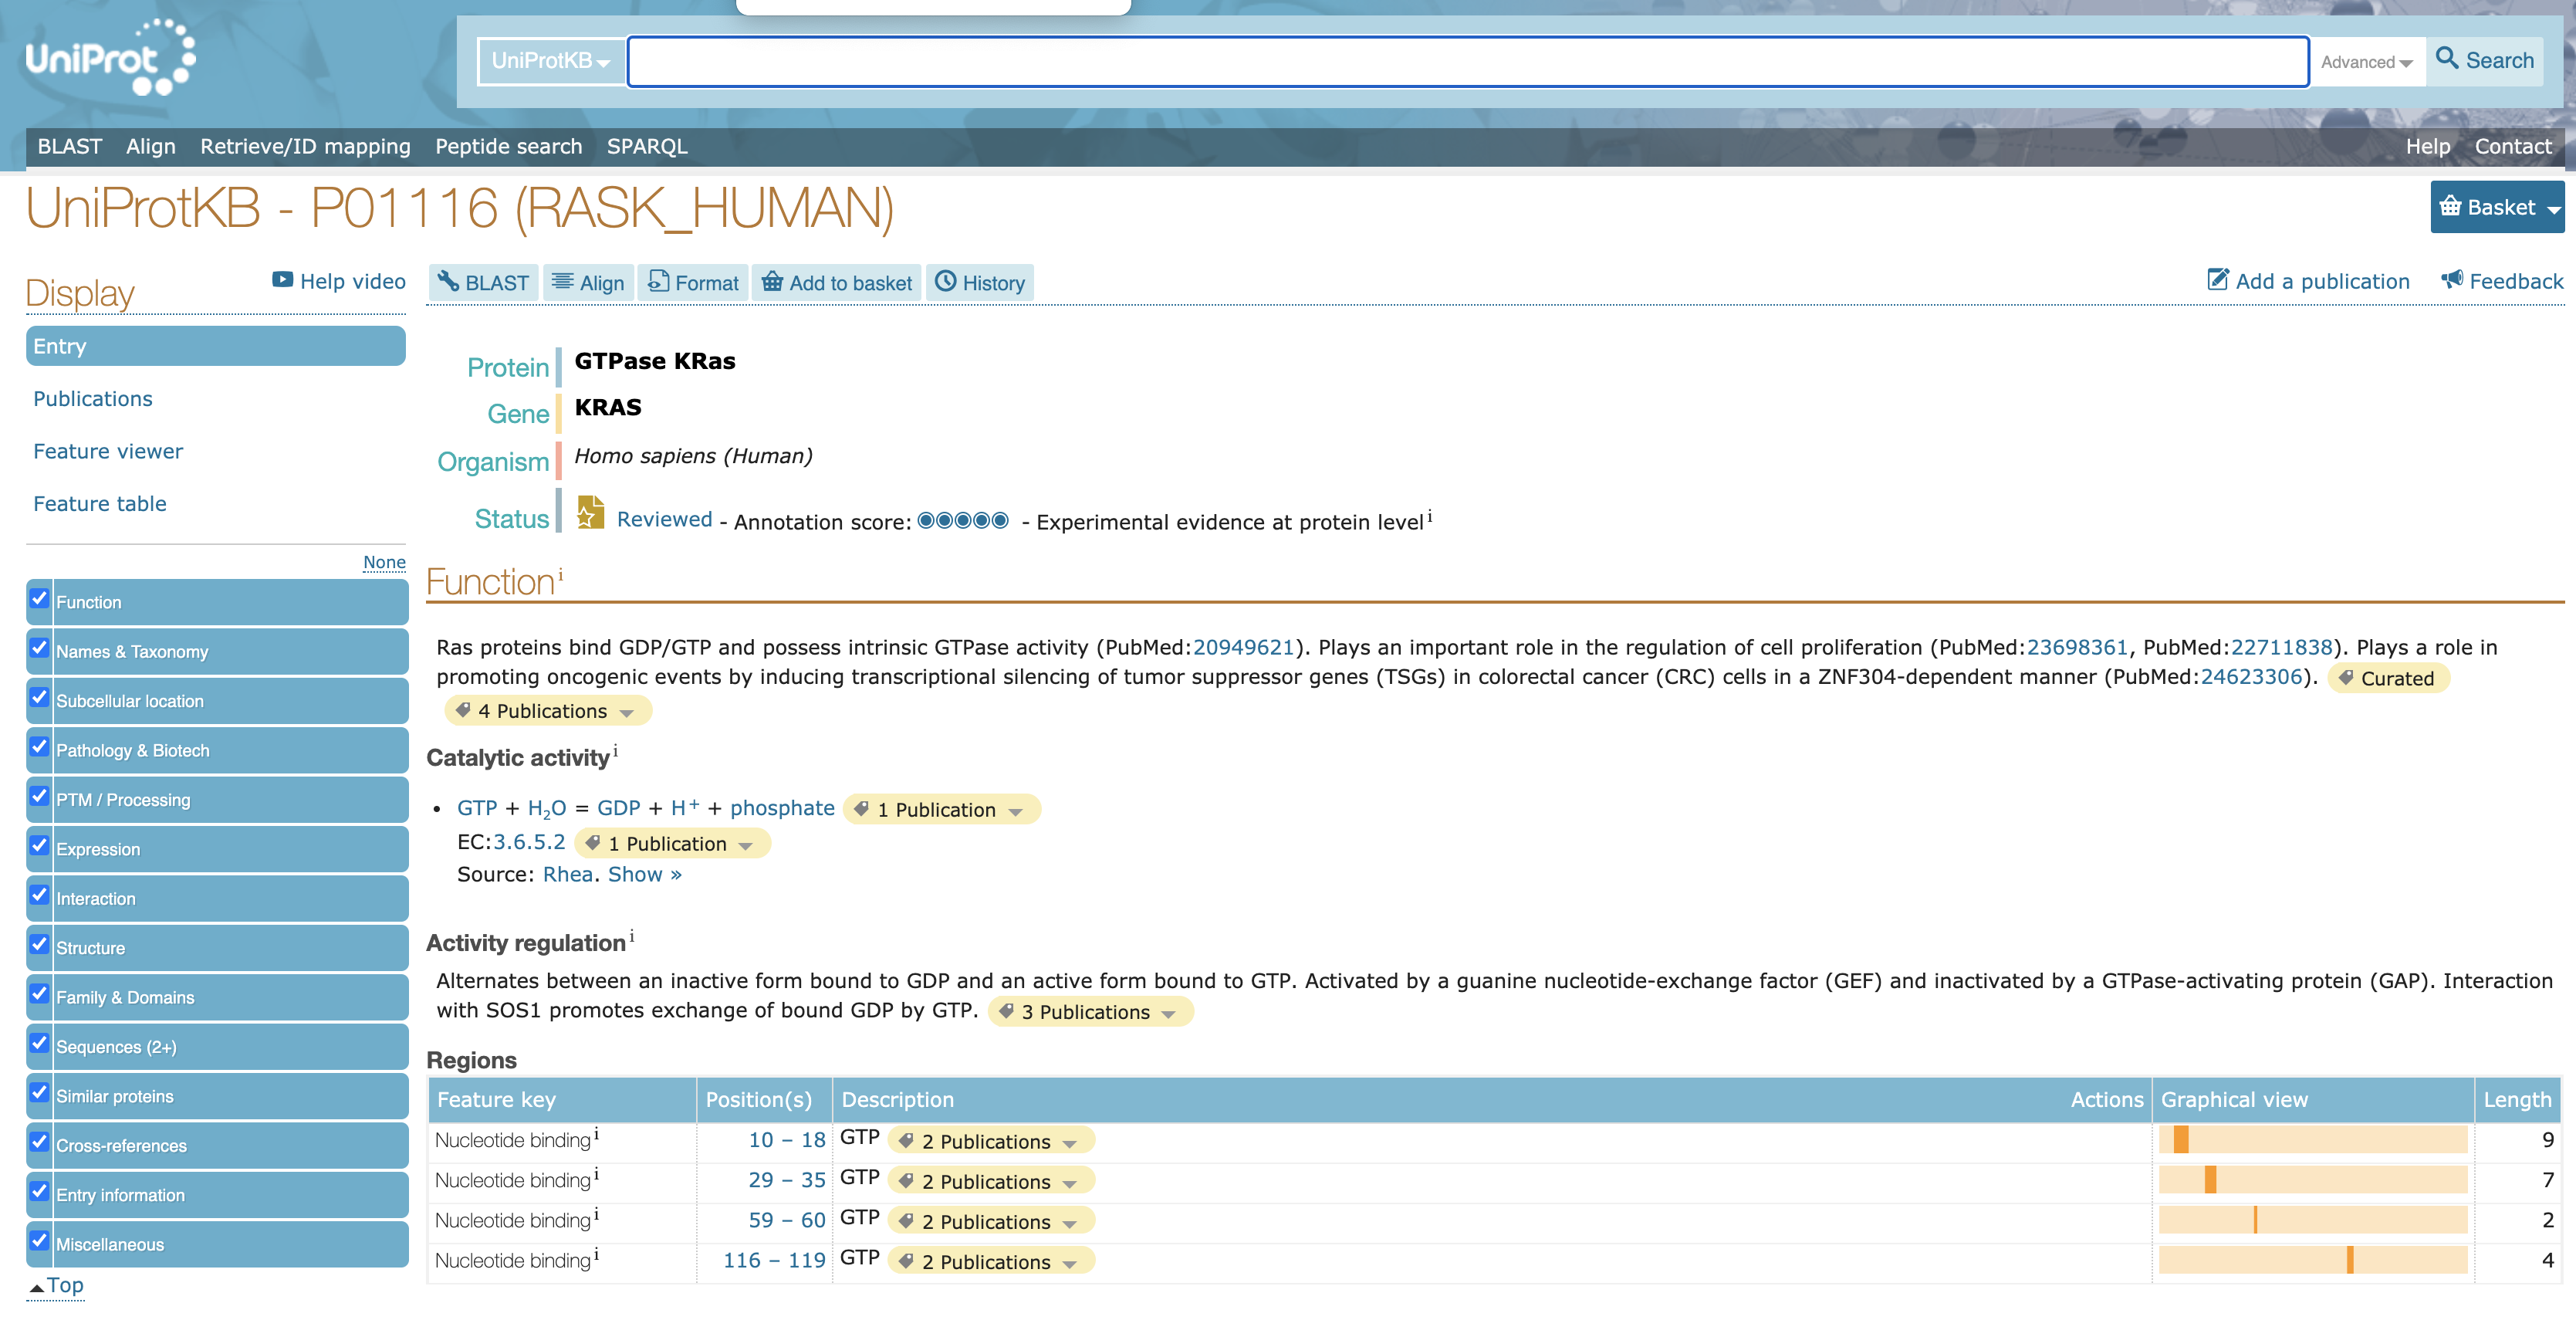


This information tells us that certain parts of the KRAS protein are used to bind GTP. To get this data programatically, we call the UniProt API like below.

In [ ]:
#Get data from UniProt about KRAS regions.
#Notice the end of the URL has been changed and now the query pulls different information from UniProt.
region_response = requests.get('https://www.ebi.ac.uk/proteins/api/features/' + kras_accession + '?types=BINDING')
print(type(region_response))
print(region_response.text)

<class 'requests.models.Response'>
{"accession":"P01116","entryName":"RASK_HUMAN","sequence":"MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM","sequenceChecksum":"973547B2E11C2C81","taxid":9606,"features":[{"type":"BINDING","category":"DOMAINS_AND_SITES","description":"","begin":"10","end":"18","molecule":"","ligand":{"name":"GTP","dbReference":{"name":"ChEBI","id":"CHEBI:37565"}},"evidences":[{"code":"ECO:0000269","source":{"name":"PubMed","id":"22431598","url":"http://www.ncbi.nlm.nih.gov/pubmed/22431598","alternativeUrl":"https://europepmc.org/abstract/MED/22431598"}},{"code":"ECO:0000269","source":{"name":"PubMed","id":"22566140","url":"http://www.ncbi.nlm.nih.gov/pubmed/22566140","alternativeUrl":"https://europepmc.org/abstract/MED/22566140"}}]},{"type":"BINDING","category":"DOMAINS_AND_SITES","description":"","begin":"29","end":"35","molecu

In [ ]:
#Load the data into a dictionary by creating a variable called json_region_dictionary.
##  Your code here  ##
json_region_dictionary = json.loads(region_response.text)
json_region_dictionary

{'accession': 'P01116',
 'entryName': 'RASK_HUMAN',
 'sequence': 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'sequenceChecksum': '973547B2E11C2C81',
 'taxid': 9606,
 'features': [{'type': 'BINDING',
   'category': 'DOMAINS_AND_SITES',
   'description': '',
   'begin': '10',
   'end': '18',
   'molecule': '',
   'ligand': {'name': 'GTP',
    'dbReference': {'name': 'ChEBI', 'id': 'CHEBI:37565'}},
   'evidences': [{'code': 'ECO:0000269',
     'source': {'name': 'PubMed',
      'id': '22431598',
      'url': 'http://www.ncbi.nlm.nih.gov/pubmed/22431598',
      'alternativeUrl': 'https://europepmc.org/abstract/MED/22431598'}},
    {'code': 'ECO:0000269',
     'source': {'name': 'PubMed',
      'id': '22566140',
      'url': 'http://www.ncbi.nlm.nih.gov/pubmed/22566140',
      'alternativeUrl': 'https://europepmc.org/abstract/MED/22566140'}}]}

Now, we want to get specific information from the dictionary we just created. Because these regions are binding sites, we have a beginning and an end location. We need both of those numbers to get the full region. We can store them as tuples in a list, as all of their descriptions are 'GTP'.

In [ ]:
kras_regions = [] #creates a list
#Iterate through the json_region_dictionary for each variant and add the beginning and end locations as a tuple to the kras_regions list.
##  Your code here  ##

def find_GTP_bind_sites(dict):

  i = 0
  while i < len(dict['features']):
    begin = dict['features'][i]['begin']
    end = dict['features'][i]['end']

    kras_regions.append((begin,end))
    i += 1

find_GTP_bind_sites(json_region_dictionary)
print(kras_regions)



[('10', '18'), ('29', '35'), ('59', '60'), ('116', '119')]


These regions are all responsible for binding GTP. A mutation  within this region might affect the proteins function.

## PRACTICE PROBLEMS

7. The LUAD cohort has many tumors with TP53 missense mutations. How many of these mutations are natural variants listed in UniProt?

In [ ]:
###       Question 7         ###
#  The LUAD cohort has many tumors with TP53 missense mutations.
#  How many of these mutations are natural variants listed in UniProt?
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###
import requests
url = 'https://rest.uniprot.org/uniprotkb/search'

params = {
    'format':'list',
    'query' : 'gene_exact:tp53 AND organism_id:9606 AND reviewed:true'
}

response = requests.get(url, params=params)
tp53_accession = response.text.rstrip()
print(tp53_accession)

P04637


In [ ]:
variant_response = requests.get('https://www.ebi.ac.uk/proteins/api/features/' + tp53_accession + '?types=VARIANT')
print(variant_response.text)

json_variant_disctionary_1 = json.loads(variant_response.text)
json_variant_disctionary_1


{"accession":"P04637","entryName":"P53_HUMAN","sequence":"MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD","sequenceChecksum":"AD5C149FD8106131","taxid":9606,"features":[{"type":"VARIANT","category":"VARIANTS","ftId":"VAR_044543","description":"in a sporadic cancer; somatic mutation; abolishes strongly phosphorylation","alternativeSequence":"H","begin":"5","end":"5","molecule":""},{"type":"VARIANT","category":"VARIANTS","ftId":"VAR_044544","description":"in a sporadic cancer; somatic mutation; reduces interaction with ZNF385A","alternativeSequence":"L","begin":"6","end":"6","molecule":""},{"type":"VARIANT","category":"VARIANTS","ftId":"VAR_005851

{'accession': 'P04637',
 'entryName': 'P53_HUMAN',
 'sequence': 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD',
 'sequenceChecksum': 'AD5C149FD8106131',
 'taxid': 9606,
 'features': [{'type': 'VARIANT',
   'category': 'VARIANTS',
   'ftId': 'VAR_044543',
   'description': 'in a sporadic cancer; somatic mutation; abolishes strongly phosphorylation',
   'alternativeSequence': 'H',
   'begin': '5',
   'end': '5',
   'molecule': ''},
  {'type': 'VARIANT',
   'category': 'VARIANTS',
   'ftId': 'VAR_044544',
   'description': 'in a sporadic cancer; somatic mutation; reduces interaction with ZNF385A',
   'alternativeSequence': 'L',
   'begin': '6',
 

In [ ]:
tp53_variants = {}

def find_natural_variants(dict):

  i = 0
  var_dict = {}
  while i < len(dict['features']):

    if dict['features'][i]['alternativeSequence'] in var_dict.keys():
      var_dict[dict['features'][i]['alternativeSequence']].add(dict['features'][i]['begin'])
    else:
      var_dict[dict['features'][i]['alternativeSequence']] = {dict['features'][i]['begin']}

    i += 1
  return var_dict

tp53_variants = find_natural_variants(json_variant_disctionary_1)

for k,v in tp53_variants.items():
  print(f"{k}: \n {v}")


H: 
 {'184', '250', '205', '379', '295', '317', '235', '104', '142', '202', '262', '208', '337', '158', '194', '219', '52', '156', '238', '278', '263', '165', '268', '177', '311', '234', '151', '153', '130', '207', '49', '220', '236', '330', '131', '290', '239', '289', '5', '186', '190', '181', '252', '331', '228', '283', '7', '72', '192', '327', '259', '167', '107', '110', '144', '175', '267', '126', '273', '223', '245', '163', '335', '281', '191', '352', '136', '282', '210'}
L: 
 {'301', '157', '82', '322', '6', '219', '233', '243', '122', '212', '67', '286', '146', '89', '178', '232', '318', '342', '273', '175', '94', '223', '338', '217', '258', '85', '248', '250', '213', '222', '132', '133', '337', '47', '104', '251', '36', '216', '272', '54', '173', '225', '177', '153', '34', '328', '183', '290', '296', '181', '92', '283', '72', '192', '167', '335', '80', '300', '385', '282', '113', '143', '218', '270', '196', '295', '317', '202', '158', '134', '195', '392', '278', '165', '274', '

In [ ]:
luad_tp53 = luad_missense.loc[(luad_missense['Gene'] == 'TP53')]
print(luad_tp53)

loc_1 = luad_tp53['Location']
loc_1

luad_tp53_variants = isolate_variants(loc_1)

for k,v in luad_tp53_variants.items():
  print(f"{k}: \n{v}")

luad_natural_overlaps_1 = find_overlap_regions(luad_tp53_variants,tp53_variants)

no_of_overlaps = 0
for k,v in luad_natural_overlaps_1.items():

  no_of_overlaps += len(luad_natural_overlaps_1[k])

answer_7 = no_of_overlaps
print(answer_7)


Name        Gene           Mutation Location
Patient_ID                                  
C3L-00009   TP53  Missense_Mutation  p.M246V
C3L-00080   TP53  Missense_Mutation  p.G245V
C3L-00095   TP53  Missense_Mutation  p.R156P
C3L-00144   TP53  Missense_Mutation  p.G154V
C3L-00279   TP53  Missense_Mutation  p.I195T
C3L-00510   TP53  Missense_Mutation  p.C176Y
C3L-00913   TP53  Missense_Mutation  p.G105C
C3L-01682   TP53  Missense_Mutation  p.V173L
C3L-01924   TP53  Missense_Mutation  p.R283P
C3L-02365   TP53  Missense_Mutation  p.S215I
C3N-00169   TP53  Missense_Mutation  p.R249M
C3N-00180   TP53  Missense_Mutation  p.C277F
C3N-00203   TP53  Missense_Mutation  p.H179R
C3N-00217   TP53  Missense_Mutation  p.R156P
C3N-00546   TP53  Missense_Mutation  p.M237I
C3N-00547   TP53  Missense_Mutation  p.N131I
C3N-00549   TP53  Missense_Mutation  p.G245V
C3N-00552   TP53  Missense_Mutation  p.G245S
C3N-00559   TP53  Missense_Mutation  p.R273H
C3N-00572   TP53  Missense_Mutation  p.F341Y
C3N-00579 

In [ ]:
###  Question 7: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_7'.
result = hw.submit(question = 7, answer = answer_7)
print(result)

True


In [ ]:
### Question 7: Getting help ###
hints = hw.getHint(question=7)
print(hints)

Question 7 hints:
*Access information for the gene TP53 the same way we accessed KRAS variants.
*Find a way to compare the TP53 variants with the locations of the missense mutations.


8. MAP Kinases are important signaling proteins and are sometimes mutated in cancer. In the breast cancer dataset, MAP3K1 has a mutation in a functional region. What is the mutation?

In [ ]:
###       Question 8         ###
#  MAP Kinases are important signaling proteins and are sometimes mutated in cancer.
#  In the breast cancer dataset, MAP3K1 has a mutation in a functional region.
#  What is the mutation?
#  Your answer should be the missense mutation code, e.g. p.Q61H
#  You should derive your answer with coding, not any shortcuts.

###      Your code here      ###
# HINT. to access breast cancer data, use -
cptac.download('brca')
br = cptac.Brca()

# br_mutations = br.get_somatic_mutation()
# br_m3k1_mutations = br_mutations.loc[(br_mutations['Gene'] == 'MAP3K1')]
# br_m3k1_mutations

Name,Gene,Mutation,Location
Patient_ID,,,
X01BR043,MAP3K1,Missense_Mutation,p.P1011S
X03BR004,MAP3K1,Missense_Mutation,p.R364W
X03BR004,MAP3K1,Frame_Shift_Ins,p.N1320Kfs*5
X05BR038,MAP3K1,Nonsense_Mutation,p.S398*
X05BR038,MAP3K1,Missense_Mutation,p.S1016C
X06BR014,MAP3K1,Splice_Site,p.X1464_splice
X11BR014,MAP3K1,Frame_Shift_Del,p.Q390Rfs*46
X11BR014,MAP3K1,Missense_Mutation,p.A1417V
X11BR025,MAP3K1,Frame_Shift_Del,p.K1160Rfs*12


In [ ]:
br_mutations = br.get_somatic_mutation()
br_m3k1_mutations = br_mutations.loc[(br_mutations['Gene'] == 'MAP3K1') & (br_mutations['Mutation'] != 'Nonsense_Mutation')]
print(br_m3k1_mutations)
loc_2 = br_m3k1_mutations['Location']
loc_2

def isolate_variants_1(loc):

  import re
  pattern = re.compile(r"p.([ARNDBCEQZGHILKMFPSTWYVX\*]{1})(\d+)[_]?([ARNDBCEQZGHILKMFPSTWYVX\*]{1}|[\w]*|[ARNDBCEQZGHILKMFPSTWYVX\*]{1}(\d+)[\w]*[ARNDBCEQZGHILKMFPSTWYVX\*]{1})")


  variants = {}

  for patient,location in loc.items():

    mo_1 = re.search(pattern,location)
    # print(mo_1.group(1), i)
    variants[location] = int(mo_1.group(2))

  return variants


br_mutations_loc = isolate_variants_1(loc_2)
br_mutations_loc

Name          Gene           Mutation        Location
Patient_ID                                           
X01BR043    MAP3K1  Missense_Mutation        p.P1011S
X03BR004    MAP3K1  Missense_Mutation         p.R364W
X03BR004    MAP3K1    Frame_Shift_Ins    p.N1320Kfs*5
X05BR038    MAP3K1  Missense_Mutation        p.S1016C
X06BR014    MAP3K1        Splice_Site  p.X1464_splice
X11BR014    MAP3K1    Frame_Shift_Del    p.Q390Rfs*46
X11BR014    MAP3K1  Missense_Mutation        p.A1417V
X11BR025    MAP3K1    Frame_Shift_Del   p.K1160Rfs*12
X11BR025    MAP3K1  Missense_Mutation        p.G1436V
X11BR028    MAP3K1             Silent         p.P298P
X14BR014    MAP3K1    Frame_Shift_Del    p.N605Ifs*51
X16BR012    MAP3K1             Silent         p.V647V
X16BR012    MAP3K1  Missense_Mutation        p.A1396V
X18BR003    MAP3K1  Missense_Mutation         p.P666S


{'p.P1011S': 1011,
 'p.R364W': 364,
 'p.N1320Kfs*5': 1320,
 'p.S1016C': 1016,
 'p.X1464_splice': 1464,
 'p.Q390Rfs*46': 390,
 'p.A1417V': 1417,
 'p.K1160Rfs*12': 1160,
 'p.G1436V': 1436,
 'p.P298P': 298,
 'p.N605Ifs*51': 605,
 'p.V647V': 647,
 'p.A1396V': 1396,
 'p.P666S': 666}

In [ ]:
import requests

url = 'https://rest.uniprot.org/uniprotkb/search'

params = {
    'format':'list',
    'query':'gene_exact:map3k1 AND organism_id:9606 AND reviewed:true'
}

response = requests.get(url, params = params)
map3k1_accession = response.text.rstrip()
print(map3k1_accession)

region_response = requests.get('https://www.ebi.ac.uk/proteins/api/features/'+ map3k1_accession + '?types=ZN_FING,BINDING')
print(region_response.text)

json_mutation_dict = json.loads(region_response.text)
json_mutation_dict

func_reg = []

def find_functional_regions(dict):
  func = []

  i = 0
  while i < len(dict['features']):
    begin = int(dict['features'][i]['begin'])
    end = int(dict['features'][i]['end'])

    func.append((begin,end))
    i += 1

  return func

func_reg = find_functional_regions(json_mutation_dict)
func_reg




Q13233
{"accession":"Q13233","entryName":"M3K1_HUMAN","sequence":"MAAAAGNRASSSGFPGARATSPEAGGGGGALKASSAPAAAAGLLREAGSGGRERADWRRRQLRKVRSVELDQLPEQPLFLAASPPASSTSPSPEPADAAGSGTGFQPVAVPPPHGAASRGGAHLTESVAAPDSGASSPAAAEPGEKRAPAAEPSPAAAPAGREMENKETLKGLHKMDDRPEERMIREKLKATCMPAWKHEWLERRNRRGPVVVKPIPVKGDGSEMNHLAAESPGEVQASAASPASKGRRSPSPGNSPSGRTVKSESPGVRRKRVSPVPFQSGRITPPRRAPSPDGFSPYSPEETNRRVNKVMRARLYLLQQIGPNSFLIGGDSPDNKYRVFIGPQNCSCARGTFCIHLLFVMLRVFQLEPSDPMLWRKTLKNFEVESLFQKYHSRRSSRIKAPSRNTIQKFVSRMSNSHTLSSSSTSTSSSENSIKDEEEQMCPICLLGMLDEESLTVCEDGCRNKLHHHCMSIWAEECRRNREPLICPLCRSKWRSHDFYSHELSSPVDSPSSLRAAQQQTVQQQPLAGSRRNQESNFNLTHYGTQQIPPAYKDLAEPWIQVFGMELVGCLFSRNWNVREMALRRLSHDVSGALLLANGESTGNSGGSSGSSPSGGATSGSSQTSISGDVVEACCSVLSMVCADPVYKVYVAALKTLRAMLVYTPCHSLAERIKLQRLLQPVVDTILVKCADANSRTSQLSISTLLELCKGQAGELAVGREILKAGSIGIGGVDYVLNCILGNQTESNNWQELLGRLCLIDRLLLEFPAEFYPHIVSTDVSQAEPVEIRYKKLLSLLTFALQSIDNSHSMVGKLSRRIYLSSARMVTTVPHVFSKLLEMLSVSSSTHFTRMRRRLMAIADEVEIAEAIQLGVEDTLDGQQDSFLQASVPNNYLETTENSSPECTVHLEKTGKGLCATKLSASSEDISERLASI

[(338, 366), (443, 492), (1249, 1257), (1272, 1272)]

In [ ]:
def find_mutation(list,dict):

  mutation = []

  i = 0
  while i < len(list):
    begin = list[i][0]
    end = list[i][1]

    for k,v in dict.items():
      if v >= begin and v <= end:
        mutation.append(k)
      else:
        continue

    i += 1

  return mutation

mutation = find_mutation(func_reg,br_mutations_loc)
print(mutation)

answer_8 = mutation[0]

['p.R364W']


In [ ]:
###  Question 8: Submitting the answer   ###
# To submit, your code above should have created a variable 'answer_8'.
result = hw.submit(question = 8, answer = answer_8)
print(result)

True


In [ ]:
### Question 8: Getting help ###
hints = hw.getHint(question=8)
print(hints)

# Part 5. Turn it in
**Congrats!**

Now that you have finished the assignment, use the endSession command to report your score. Once you have completed the notebook, please share it with your instructor.

In [ ]:
hw.endSession()




                      SESSION SUMMARY                       
------------------------------------------------------------
Student ID:                                           s15211
Homework:                                         bio462_hw2
------------------------------------------------------------
  Question  |  Correct  |  Attempts  |        Answer        
     1      |    No     |     1      |   Q
     2      |    Yes    |     1      |   p.G12C
     3      |    Yes    |     1      |   16
     4      |    Yes    |     1      |   TTN
     5      |    Yes    |     1      |   79
     6      |    No     |     1      |   A1CF_p.Q61H, A2ML1_p.Q61H, A2M_p.Q61H, A4GNT_p.Q61H, AACS_p.Q61H, AARS2_p.Q61H, AATK_p.Q61H, ABCA10_p.Q61H, ABCA12_p.Q61H, ABCA13_p.Q61H, ABCA1_p.Q61H, ABCA2_p.Q61H, ABCA3_p.Q61H, ABCA4_p.Q61H, ABCA5_p.Q61H, ABCA8_p.Q61H, ABCB10_p.Q61H, ABCB11_p.Q61H, ABCB1_p.Q61H, ABCB4_p.Q61H, ABCB5_p.Q61H, ABCB6_p.Q61H, ABCC10_p.Q61H, ABCC11_p.Q61H, ABCC2_p.Q61H, ABCC3_p.Q61H, AB